In [3]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import os
import matplotlib.pyplot as plt

tf.enable_eager_execution()

print('Tensorflow version: {}'.format(tf.__version__))
print('Eager execution: {}'.format(tf.executing_eagerly()))

Tensorflow version: 1.13.1
Eager execution: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)

print('train dataset file: {}'.format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
train dataset file: /root/.keras/datasets/iris_training.csv


In [8]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [10]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print('feature names: {}'.format(feature_names))
print('label name: {}'.format(label_name))

feature names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label name: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [0]:
train_dataset = tf.data.experimental.make_csv_dataset(file_pattern=train_dataset_fp, batch_size=32, column_names=column_names, label_name=label_name,
                                     num_epochs=1)

In [19]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=110, shape=(32,), dtype=float32, numpy=
              array([6.3, 6.9, 4.9, 6.5, 6.4, 5. , 6.2, 5. , 4.6, 4.5, 4.4, 6. , 5.6,
                     6.8, 5. , 4.6, 5.1, 5.1, 6.6, 4.9, 5. , 5.4, 6. , 6.8, 5.2, 6.1,
                     6.6, 7.2, 6.9, 7.7, 5.5, 5.5], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=111, shape=(32,), dtype=float32, numpy=
              array([3.4, 3.2, 3.1, 3. , 2.8, 2.3, 2.8, 3.4, 3.6, 2.3, 3. , 3. , 2.5,
                     3.2, 3.5, 3.1, 3.8, 3.8, 3. , 2.5, 3.2, 3.9, 2.9, 2.8, 3.4, 2.8,
                     2.9, 3. , 3.1, 2.8, 2.4, 3.5], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=108, shape=(32,), dtype=float32, numpy=
              array([5.6, 5.7, 1.5, 5.2, 5.6, 3.3, 4.8, 1.6, 1. , 1.3, 1.3, 4.8, 3.9,
                     5.9, 1.6, 1.5, 1.5, 1.6, 4.4, 4.5, 1.2, 1.3, 4.5, 4.8, 1.4, 4.7,
                     4.6, 5.8, 4.9, 6.7, 3.7, 1.

In [25]:
type(features.values())

odict_values

Text(0, 0.5, 'petal length')

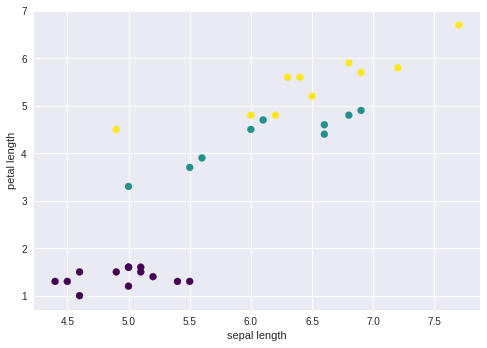

In [24]:
plt.scatter(x=features['sepal_length'], y=features['petal_length'], c=labels.numpy(), cmap='viridis')
plt.xlabel('sepal length')
:plt.ylabel('petal length')

In [0]:
def pack_features_vector(features, labels):
  datasets = tf.stack(list(features.values()), axis=1)
  return datasets, labels

In [0]:
train_dataset = train_dataset.map(pack_features_vector)

In [29]:
features, labels = next(iter(train_dataset))
features[:5]

<tf.Tensor: id=213, shape=(5, 4), dtype=float32, numpy=
array([[5.4, 3.4, 1.5, 0.4],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.8, 2.8, 4.8, 1.4],
       [5. , 2. , 3.5, 1. ]], dtype=float32)>